In [2]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = 18,8

In [81]:
def extract_data(path, wl, t='60.0sec', ori = "unk", nd = False, label = None, pw_corr=False):
    
    f = h5.File(path, 'r')
    gp = f['spectra'][wl][ori][t]
    
    sp_data = gp['sp_data']; bg_data = gp['bg_data']; powers = gp['power_samples']
    
    em_wl = sp_data['em_wl'][0]; count = sp_data['count'][0]
    em_wl_bg = bg_data['em_wl'][0]; count_bg = bg_data['count'][0]
    y = np.subtract(count, count_bg)
    
    if pw_corr == True:
    
        y = np.divide(y, powers[0])
    
    if nd != False:
        y = np.divide(y,nd)
    
    plt.plot(em_wl, y, label = label)
    plt.legend()
    plt.grid("on")
    
    return sp_data, bg_data, powers

def gaussian(x,m,s,A):
    return A * np.exp(-(x-m)**2/(2*s**2))

def two_gauss(x,m1,m2,s1,s2,A1,A2):
    return gaussian(x,m1,s1,A1) + gaussian(x,m2,s2,A2)

In [82]:
path_to_study = "/home/hargy/Documents/3CS/repo_data3cs/data3cs/studies/the_irreducibles"

In [106]:
# coll1

# prism
prism_off_path = f'{path_to_study}/coll1/Prism/prism_off.hdf5'
prism_on_path = f'{path_to_study}/coll1/Prism/prism_on.hdf5'

# ZnO
ZnO_B3_500_path = f'{path_to_study}/coll1/ZnO/ZnO_B3_500.hdf5'
ZnO_B3_501_path = f'{path_to_study}/coll1/ZnO/ZnO_B3_501.hdf5'

# LiF
LiF_146_off_path = f'{path_to_study}/coll1/LiF/LiF_B2_146_off.hdf5'
LiF_146_on_path = f'{path_to_study}/coll1/LiF/LiF_B2_146_on.hdf5'

LiF_154_off_path = f'{path_to_study}/coll1/LiF/LiF_B2_154_off.hdf5'
LiF_154_on_path = f'{path_to_study}/coll1/LiF/LiF_B2_154_on.hdf5'

LiF_160_off_path = f'{path_to_study}/coll1/LiF/LiF_B2_160_off.hdf5'
LiF_160_on_path = f'{path_to_study}/coll1/LiF/LiF_B2_160_on.hdf5'


# BaF
BaF_412_off_path = f'{path_to_study}/coll1/BaF/BaF_412_off.hdf5'
BaF_412_on_path = f'{path_to_study}/coll1/BaF/BaF_412_on.hdf5'

BaF_190_off_path = f'{path_to_study}/coll1/BaF/BaF_B2_190_off.hdf5'
BaF_190_on_path = f'{path_to_study}/coll1/BaF/BaF_B2_190_on.hdf5'

BaF_191_off_path = f'{path_to_study}/coll1/BaF/BaF_B2_191_off.hdf5'
BaF_191_on_path = f'{path_to_study}/coll1/BaF/BaF_B2_191_on.hdf5'


# MgF
MgF_103_off_path = f'{path_to_study}/coll11/MgF/MgF_B2_103_off.hdf5'
MgF_103_on_path = f'{path_to_study}/coll1/MgF/MgF_B2_103_on.hdf5'

MgF_110_off_path = f'{path_to_study}/coll1/MgF/MgF_B2_110_off.hdf5'
MgF_110_on_path = f'{path_to_study}/coll1/MgF/MgF_B2_110_on.hdf5'


# coll2

# ZnO
ZnO_B3_500_path2 = f'{path_to_study}/coll2/ZnO/ZnO_B3_500.hdf5'
ZnO_B3_501_path2 = f'{path_to_study}/coll2/ZnO/ZnO_B3_501.hdf5'

# LiF
LiF_146_off_path2 = f'{path_to_study}/coll2/LiF/LiF_B2_146_off.hdf5'
LiF_146_on_path2 = f'{path_to_study}/coll2/LiF/LiF_B2_146_on.hdf5'

LiF_154_off_path2 = f'{path_to_study}/coll2/LiF/LiF_B2_154_off.hdf5'
LiF_154_on_path2 = f'{path_to_study}/coll2/LiF/LiF_B2_154_on.hdf5'

LiF_160_off_path2 = f'{path_to_study}/coll2/LiF/LiF_B2_160_off.hdf5'
LiF_160_on_path2 = f'{path_to_study}/coll2/LiF/LiF_B2_160_on.hdf5'


# BaF
BaF_412_off_path2 = f'{path_to_study}/coll2/BaF/BaF_412_off.hdf5'
BaF_412_on_path2 = f'{path_to_study}/coll2/BaF/BaF_412_on.hdf5'

BaF_190_off_path2 = f'{path_to_study}/coll2/BaF/BaF_B2_190_off.hdf5'
BaF_190_on_path2 = f'{path_to_study}/coll2/BaF/BaF_B2_190_on.hdf5'

BaF_191_off_path2 = f'{path_to_study}/coll2/BaF/BaF_B2_191_off.hdf5'
BaF_191_on_path2 = f'{path_to_study}/coll2/BaF/BaF_B2_191_on.hdf5'


# MgF
MgF_103_off_path2 = f'{path_to_study}/coll2/MgF/MgF_B2_103_off.hdf5'
MgF_103_on_path2 = f'{path_to_study}/coll2/MgF/MgF_B2_103_on.hdf5'

MgF_110_off_path2 = f'{path_to_study}/coll2/MgF/MgF_B2_110_off.hdf5'
MgF_110_on_path2 = f'{path_to_study}/coll2/MgF/MgF_B2_110_on.hdf5'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


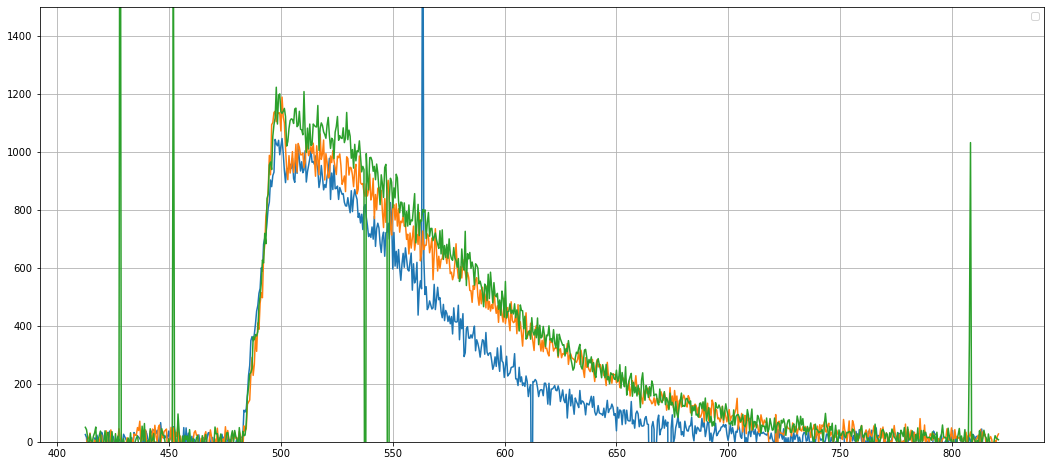

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


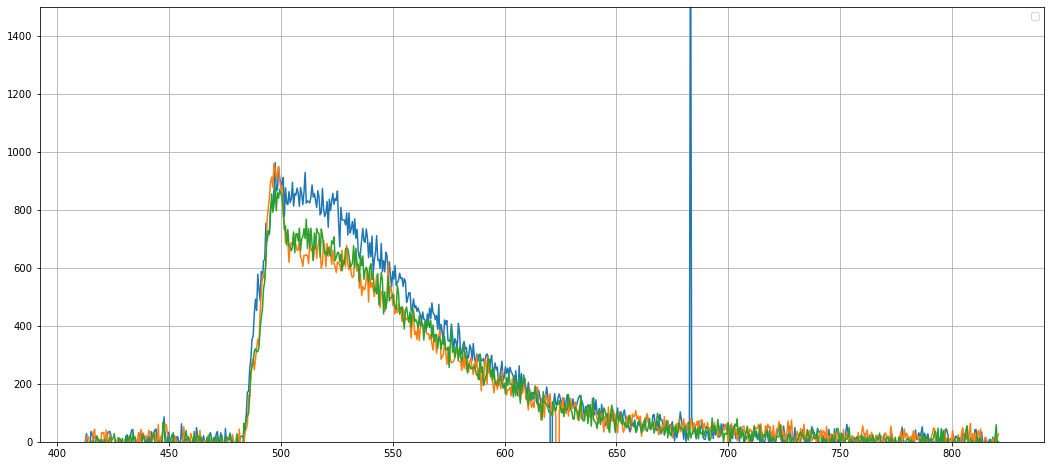

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


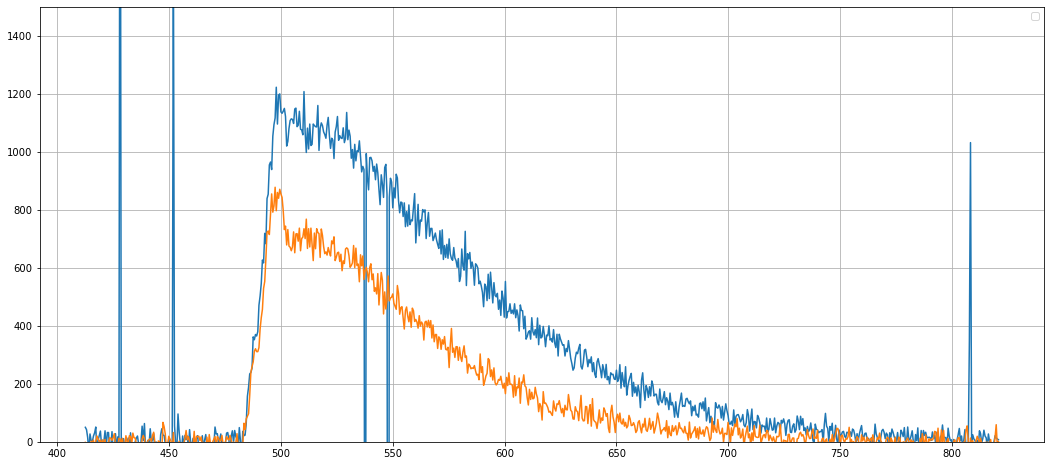

In [105]:
wl = '450'
extract_data(BaF_412_on_path,wl);
extract_data(BaF_190_on_path,wl);
extract_data(BaF_191_on_path,wl);
plt.ylim(0,1.5e3)

plt.show()

extract_data(BaF_412_on_path2,wl);
extract_data(BaF_190_on_path2,wl);
extract_data(BaF_191_on_path2,wl);
plt.ylim(0,1.5e3)

plt.show()

extract_data(BaF_191_on_path,wl);
extract_data(BaF_191_on_path2,wl);
plt.ylim(0,1.5e3)

plt.show()

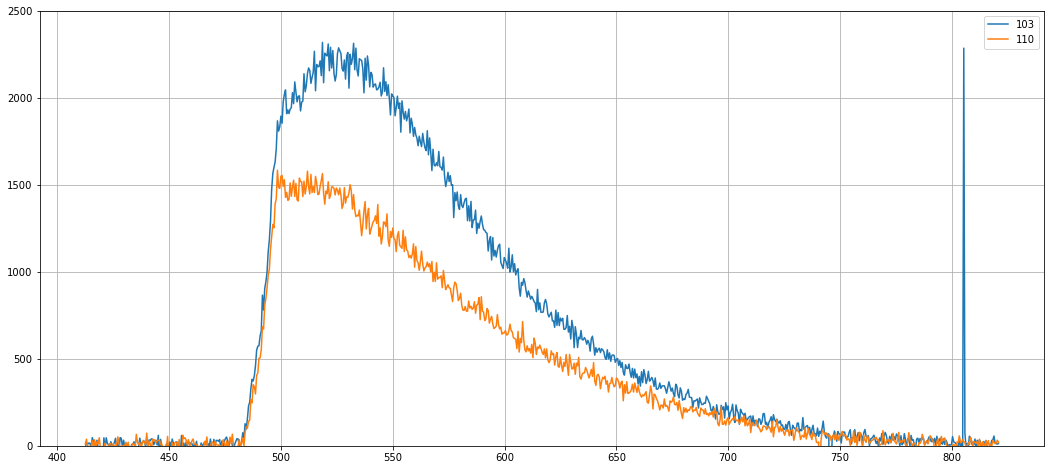

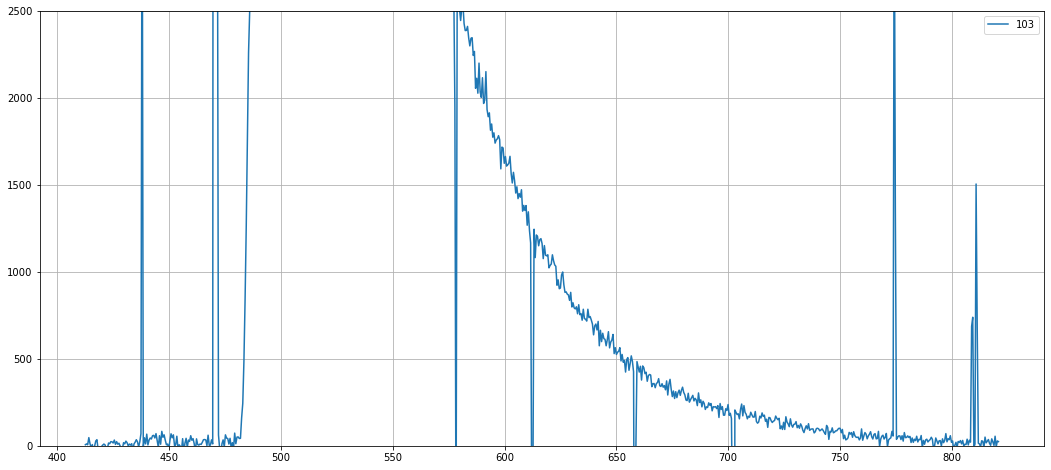

In [111]:
wl = '450'
extract_data(MgF_103_on_path,wl, label='103');
extract_data(MgF_110_on_path,wl, label='110');
plt.ylim(0,2.5e3)

plt.show()

extract_data(MgF_103_on_path2,wl, label='103');

plt.ylim(0,2.5e3)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 2500.0)

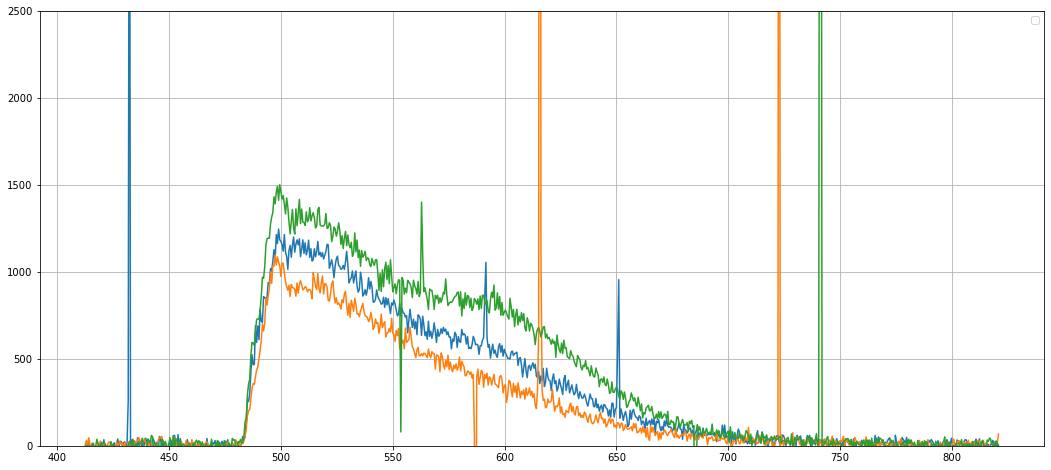

In [97]:
wl = '450'
extract_data(LiF_146_on_path2,wl);
extract_data(LiF_154_on_path2,wl);
extract_data(LiF_160_on_path2,wl);
plt.ylim(0,2.5e3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 1000.0)

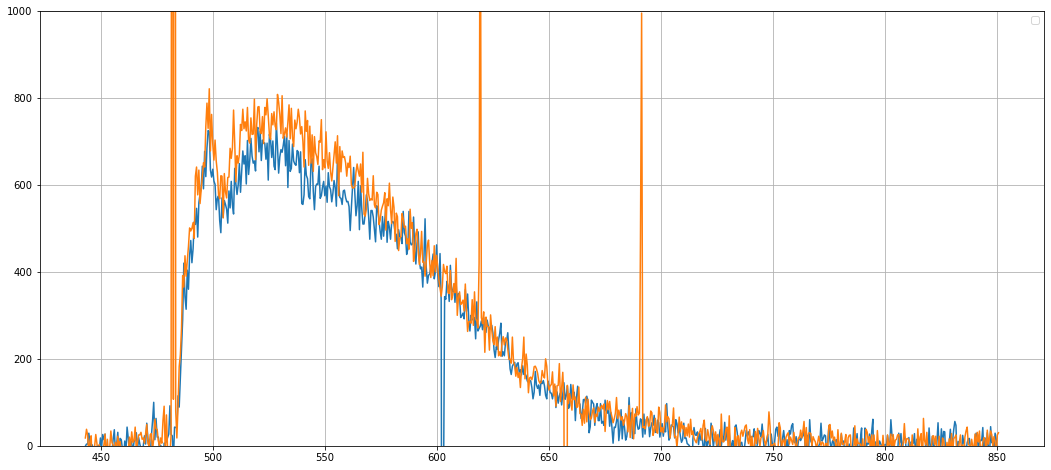

In [92]:
wl = '480'
extract_data(LiF_146_on_path,wl);
extract_data(LiF_146_on_path2,wl);
plt.ylim(0,1e3)

(0.0, 300000000.0)

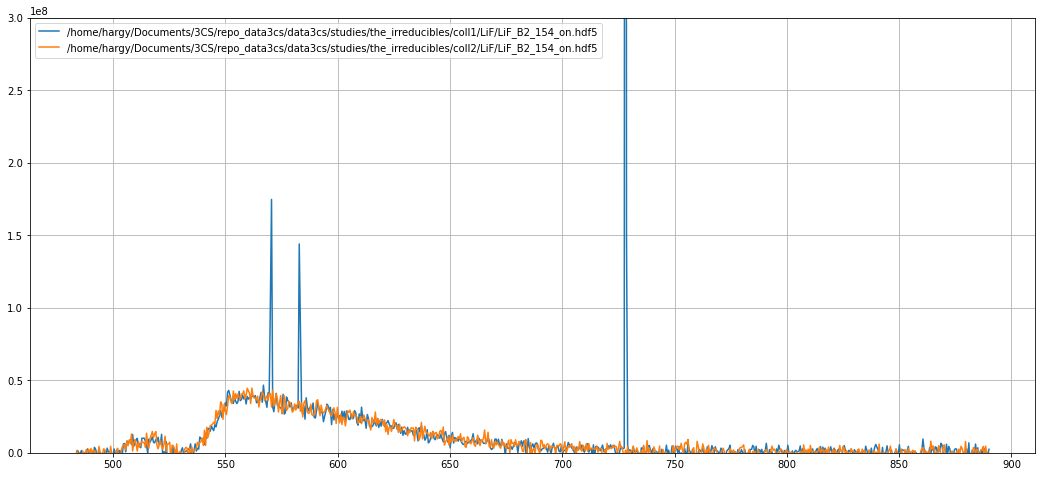

In [42]:
wl = '520'
extract_data(LiF_154_on_path,wl);
extract_data(LiF_154_on_path2,wl);
plt.ylim(0,3e8)

(0.0, 300000000.0)

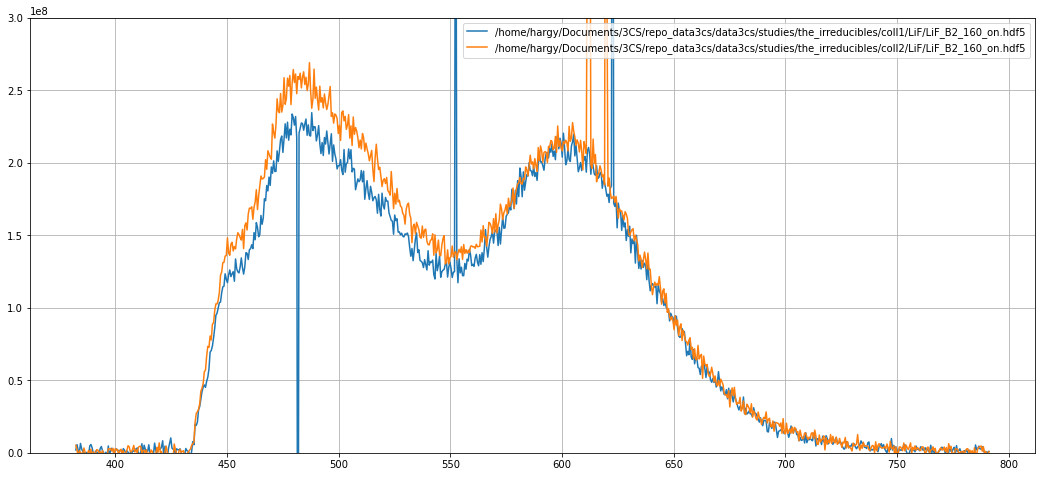

In [44]:
wl = '420'
extract_data(LiF_160_on_path,wl);
extract_data(LiF_160_on_path2,wl);
plt.ylim(0,3e8)